## Тема "Обучение без учителя"

### Задание 1

Импортируйте библиотеки **Pandas**, **Numpy** и **Matplotlib**. Загрузите **"Boston House Prices dataset"** из встроенных наборов данных библиотеки **sklearn**. Создайте датафреймы _**X**_ и _**y**_ из этих данных. Разбейте эти датафреймы на тренировочные (_**X_train, y_train**_) и тестовые (_**X_test, y_test**_) с помощью функции **train_test_split** так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент **random_state** должен быть равен 42. Масштабируйте данные с помощью **StandardScaler**. Постройте модель **t-SNE** на тренировочных данных с параметрами: **n_components = 2, learning_rate = 250, random_state = 42**. Постройте диаграмму рассеяния на этих данных.

In [1]:
# Проигнорируем предупреждения Анаконды3:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим библиотеки и данные:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
# Поместим данные в переменную boston и 
# обозначим разделы с соответствующими нецелевыми признаками:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names

In [4]:
# Преобразуем исходные данные в DataFrame и посмотрим на нецелевые:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Посмотрим информацию о нецелевых переменных, и убедимся,
# что все они являются количественными, а также не имеют пропусков:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
# Посмотрим информацию и о целевой переменной:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
# Разобьём данные на тренировачные и тестовые выборки:
# где на долю тестовых выборок приходится по 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# Посмотрим на формы новых наборов данных:
print('Формы тренировочных выборок:', X_train.shape, y_train.shape)
print('Формы тестовых выборок:', X_test.shape, y_test.shape)

Формы тренировочных выборок: (404, 13) (404, 1)
Формы тестовых выборок: (102, 13) (102, 1)


In [9]:
# Проведём масштабирование признаков с помощью стандартизации.
# Для этого, вначале, создадим объект scaler:
scaler = StandardScaler()

In [10]:
# Применим модель стандартизации к тренировочной выборке X:
X_train_scaled = scaler.fit_transform(X_train)
print('Форма массива тренировочной выборки X:', X_train_scaled.shape)

Форма массива тренировочной выборки X: (404, 13)


In [11]:
# Применим модель стандартизации к тестовой выборке X:
X_test_scaled = scaler.fit_transform(X_test)
print('Форма массива тестовой выборки X:', X_test_scaled.shape)

Форма массива тестовой выборки X: (102, 13)


In [12]:
# Переведём полученные массивы в DataFrame и посмотрим на тренировочный:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.288,-0.500,1.033,-0.278,0.489,-1.428,1.028,-0.802,1.707,1.578,0.845,-0.074,1.754
1,-0.336,-0.500,-0.413,-0.278,-0.157,-0.680,-0.431,0.324,-0.624,-0.585,1.205,0.430,-0.561
2,-0.403,1.013,-0.715,-0.278,-1.009,-0.402,-1.619,1.331,-0.974,-0.603,-0.637,0.065,-0.652
3,0.388,-0.500,1.033,-0.278,0.489,-0.300,0.592,-0.839,1.707,1.578,0.845,-3.868,1.525
4,-0.325,-0.500,-0.413,-0.278,-0.157,-0.831,0.034,-0.005,-0.624,-0.585,1.205,0.379,-0.166


In [13]:
# Посмотрим как в _scaled все признаки измеряются в одних единицах:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,-1.842585e-16,1.00124,-0.406141,-0.397976,-0.377675,-0.045821,9.630689
ZN,404.0,5.056461e-17,1.00124,-0.500320,-0.500320,-0.500320,0.364589,3.824227
INDUS,404.0,3.074548e-15,1.00124,-1.487791,-0.850273,-0.352167,1.033237,2.433163
CHAS,404.0,-5.056461e-17,1.00124,-0.278089,-0.278089,-0.278089,-0.278089,3.595975
NOX,404.0,-5.221483e-15,1.00124,-1.458711,-0.888783,-0.157233,0.633861,2.675394
RM,404.0,-4.031016e-15,1.00124,-3.461733,-0.600349,-0.149443,0.452824,3.477564
AGE,404.0,-1.001124e-15,1.00124,-2.348206,-0.822826,0.327020,0.897473,1.124581
DIS,404.0,-3.176777e-16,1.00124,-1.258391,-0.808198,-0.297120,0.748198,3.907900
RAD,404.0,-3.654942e-17,1.00124,-0.974048,-0.624360,-0.507797,0.308141,1.706891
TAX,404.0,-1.534457e-16,1.00124,-1.307684,-0.753356,-0.446066,1.578434,1.849573


In [14]:
# Построим модель TSNE на тренировочной стандартизированной выборе X,
# и для начала зададим параметры этой модели:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
print('Форма массива тренировочной выборки X пониженной размерности:', X_train_tsne.shape)

Форма массива тренировочной выборки X пониженной размерности: (404, 2)


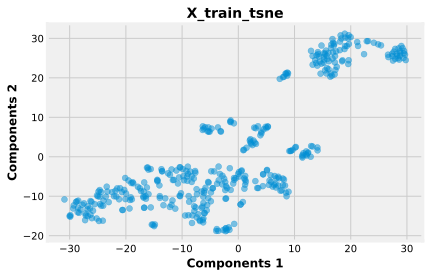

In [15]:
# Построим диаграмму рассеяния на этих данных:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha = 0.5)
plt.title('X_train_tsne', fontsize = 14, fontweight = 'bold')
plt.xlabel('Components 1', fontweight = 'bold')
plt.ylabel('Components 2', fontweight = 'bold')
plt.show()

#### Заключение:

Нам удалось понизить размерность данных путём сжатия признаков с сохранением их смысла (из 13 компонентов оставить 2), и визуализировать тренировочные данные. t-SNE можно описать как метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве. Из графика видно, что данные можно разбить, как минимум, на два кластера.

### Задание 2

С помощью **KMeans** разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма **X_train**. Параметр **max_iter** должен быть равен 100, **random_state** сделайте равным 42. Постройте ещё раз диаграмму рассеяния на данных, полученных с помощью **t-SNE**, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения **MEDV** и **CRIM** в разных кластерах.

In [16]:
# Для разбиения тренировочной стандартизированной выбори X на три кластера
# построим модель KMeans с заданными параметрами:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)

In [17]:
# Проверим количество объектов в каждом кластере:
pd.value_counts(labels_train).sort_values(ascending = True)

0     86
1    127
2    191
dtype: int64

In [18]:
# Посмотрим к какому кластеру относится каждый объект тренировочной выборки:
print(labels_train)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


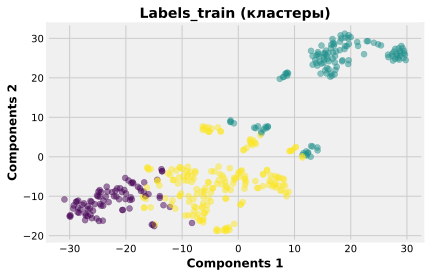

In [19]:
# И вновь построим диаграмму рассеяния, состоящую из трёх кластеров:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train, alpha = 0.5)
plt.title('Labels_train (кластеры)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Components 1', fontweight = 'bold')
plt.ylabel('Components 2', fontweight = 'bold')
plt.show()

Из графика видно, что при кластеризации мы получили практически такое же изображение, как и то, которое наблюдаем в Задании 1 в результате t-SNE метода.

In [20]:
# Вычислим средние значения цены на жильё и уровеня преступности по районам Бостона
# в каждом кластере на тренировочной выборке с использованием функции:

def bil_by_clusters(X, y, labels, X_columns, y_column):
    for cluster in np.unique(labels):
        print('Для кластера {}:'.format(cluster))
        print('\t{}:\t{}'.format(y_column, '%0.3f' % y.loc[labels == cluster, y_column].mean()))
        for X_column in X_columns:
              print('\t{}:\t{}'.format(X_column, '%0.3f' % X.loc[labels == cluster, X_column].mean()))


bil_by_clusters(X_train, y_train, labels_train, X_columns = ['CRIM'], y_column = 'MEDV')

Для кластера 0:
	MEDV:	27.788
	CRIM:	0.074
Для кластера 1:
	MEDV:	16.165
	CRIM:	10.797
Для кластера 2:
	MEDV:	24.958
	CRIM:	0.422


### Задание 3*

Примените модель **KMeans**, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения **MEDV** и **CRIM** в разных кластерах на тестовых данных.

In [21]:
# Применим модель KMeans к тестовой выборке:
labels_test = kmeans.predict(X_test_scaled)

# Проверим количество объектов в каждом кластере:
pd.value_counts(labels_test).sort_values(ascending = True)

0    22
1    35
2    45
dtype: int64

In [22]:
# Посмотрим к какому кластеру относится каждый объект тестовой выборки:
print(labels_test)

[2 0 1 0 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 0 0 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2
 2 2 0 2 2 0 0 2 1 2 0 1 2 2 0 2 2 2 1 1 0 2 0 0 0 2 2 0 2 1 0 0 1 2 1 1 0
 2 1 2 0 1 1 0 1 0 1 2 2 1 2 2 2 2 1 2 0 1 2 1 1 1 1 2 2]


In [23]:
# Вычислим средние значения цены на жильё и уровеня преступности по районам Бостона
# в каждом кластере на тестовой выборке:
bil_by_clusters(X_test, y_test, labels_test, X_columns = ['CRIM'], y_column = 'MEDV')

Для кластера 0:
	MEDV:	28.414
	CRIM:	0.080
Для кластера 1:
	MEDV:	16.437
	CRIM:	10.166
Для кластера 2:
	MEDV:	22.031
	CRIM:	0.285


#### Заключение:

Из полученных результатов Задания 2 и Задания 3 видно, что на тренировочных и тестовых выборках уровень приступности на душу населения районов Бостона обратно пропорционален ценам на жильё в этих районах. Так, самый большой уровень приступности в кластере 1 соответствует более низкой цене на жильё; на втором месте - данные в кластере 2; и, наконец, самая высокая цена на жильё, при самом низком уровне преступности, оказалась в кластере 0.

-----
END